# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

    Признаки
        - RowNumber — индекс строки в данных
        - CustomerId — уникальный идентификатор клиента
        - Surname — фамилия
        - CreditScore — кредитный рейтинг
        - Geography — страна проживания
        - Gender — пол
        - Age — возраст
        - Tenure — количество недвижимости у клиента
        - Balance — баланс на счёте
        - NumOfProducts — количество продуктов банка, используемых клиентом
        - HasCrCard — наличие кредитной карты
        - IsActiveMember — активность клиента
        - EstimatedSalary — предполагаемая зарплата
    Целевой признак
        - Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первоначальная-подготовка" data-toc-modified-id="Первоначальная-подготовка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первоначальная подготовка</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>OHE</a></span></li><li><span><a href="#Выборки" data-toc-modified-id="Выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Функции-для-моделей-(возвращают-F-меру)" data-toc-modified-id="Функции-для-моделей-(возвращают-F-меру)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функции для моделей (возвращают F-меру)</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#k-Nearest-Neighborn" data-toc-modified-id="k-Nearest-Neighborn-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>k-Nearest Neighborn</a></span></li></ul></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Подбор-гиперпараметров-моделей" data-toc-modified-id="Подбор-гиперпараметров-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гиперпараметров моделей</a></span></li><li><span><a href="#Изучение-моделей-без-учета-дисбаланса" data-toc-modified-id="Изучение-моделей-без-учета-дисбаланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучение моделей без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#Проверка-способов-балансирования" data-toc-modified-id="Проверка-способов-балансирования-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка способов балансирования</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>AUC-ROC</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


## Подготовка данных

### Первоначальная подготовка

Для начала разберемся с проблемой отсутствующих данных:

In [8]:
data = data.fillna(0)
# data = data.drop('Tenure', axis = 1)
# data = data.dropna()

Провел исследование на сбалансированной выборке:

* 0.6043165467625901 RF 24-11 с удалением столбца Tenure
* 0.6047058823529411 RF 24-11 c занулением значений NaN
* 0.5994764397905759 RF 24-11 c удалением строк

Самым перспективным показалось зануление значений. К тому же соотношение пользователей к убыли практически не меняется.

In [9]:
data.groupby('Tenure').sum()

,RowNumber,CustomerId,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Tenure,,,,,,,,,,
0.0,6367609,20257983066,838473,50146,99802350.78,1940,895,667,1.281890e+08,273
1.0,4863767,14938801908,617545,37743,73651691.07,1423,638,525,9.580487e+07,213
2.0,4807368,14910413494,621912,37284,72677292.40,1505,671,513,9.416469e+07,185
3.0,4603462,14563694440,604218,36178,72481960.01,1425,662,480,9.034233e+07,198
4.0,4463142,13886230781,575853,33733,65608236.33,1345,629,451,8.853658e+07,184
5.0,4585340,14539751658,602515,36378,70579932.69,1450,649,472,9.384899e+07,187
6.0,4406323,13823917512,570674,34040,66048645.50,1335,630,450,8.823353e+07,177
7.0,4568624,14514592613,600506,35473,70221724.73,1411,655,475,9.420427e+07,160
8.0,4603282,14637381016,605161,35917,72769146.24,1428,685,471,9.387022e+07,174


Далее удалим ненужные нам столбцы, с личной информацией:

In [10]:
data = data.drop({'Surname','CustomerId','RowNumber'},axis=1)

### OHE

Обработаем категориальные признаки, методом OHE, с удалением одного из столбцов, чтобы не попасть в дамми-ловушку.

In [11]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data = pd.get_dummies(data,drop_first=True)

In [14]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


### Выборки

Разбиваем на 60-20-20, соответственно тренировочная, валидационная и тестовая.

In [15]:
train, valid, test = np.split(data, (int(0.6*len(data)), int(0.8*len(data))))
print(train.shape, valid.shape, test.shape)
X_train = train.drop('Exited',axis=1)
y_train = train['Exited']
X_valid = valid.drop('Exited',axis=1)
y_valid = valid['Exited']
X_test = test.drop('Exited',axis=1)
y_test = test['Exited']

(6000, 12) (2000, 12) (2000, 12)


### Масштабирование признаков

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = data.drop('Exited',axis=1).columns)
X_test = pd.DataFrame(X_test, columns = data.drop('Exited',axis=1).columns)
X_valid = pd.DataFrame(X_valid, columns = data.drop('Exited',axis=1).columns)

In [17]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

## Исследование задачи

### Функции для моделей (возвращают F-меру)

#### Random Forest

In [18]:
def RF(est, dept, f_test, t_test, f_train, t_train):
#     min_samples_split
#     min_samples_leaf
    model = RandomForestClassifier(random_state=4554, 
                                   n_estimators=est, 
                                   max_depth=dept)
    model.fit(f_train,t_train)
    prediction = model.predict(f_test)
    result = f1_score(t_test,prediction)
    return result

#### Decision Tree Classifier

In [19]:
def DTC(dept, f_test, t_test, f_train, t_train):
    model = DecisionTreeClassifier(random_state=4554,max_depth=dept)
    model.fit(f_train,t_train)
    prediction = model.predict(f_test)
    result = f1_score(t_test,prediction)
    return result

#### k-Nearest Neighborn 

In [20]:
def KNN(neigbr, f_test, t_test, f_train, t_train):
    model = KNeighborsClassifier(n_neighbors=neigbr)
    model.fit(f_train,t_train)
    prediction = model.predict(f_test)
    result = f1_score(t_test,prediction)
    return result

### Баланс классов

Исследуем баланс классов:

In [21]:
X_zeros = X_train[y_train == 0]
X_ones = X_train[y_train == 1]
y_zeros = y_train[y_train == 0]
y_ones = y_train[y_train == 1]

In [22]:
print(X_zeros.shape)
print(X_ones.shape)
print(y_zeros.shape)
print(y_ones.shape)

(4751, 11)
(1249, 11)
(4751,)
(1249,)


In [23]:
X_zeros.shape[0]/X_ones.shape[0]

3.8038430744595675

Почти 1 к 4

### Подбор гиперпараметров моделей

Для Random Forest

In [24]:
def RF_param(X_valid, y_valid, X_train, y_train):
    best_res_rf = 0
    best_max_depth = 0
    best_est = 0
    for n_estimators in range(20,50):
        for max_depth in range(4,15):
            result = RF(n_estimators,max_depth,X_valid,y_valid,X_train,y_train)
    #       
            if best_res_rf < result: 
                best_res_rf = result
                best_est = n_estimators
                best_max_depth = max_depth
    return best_est, best_max_depth, best_res_rf

In [25]:
%%time
best_est, best_max_depth, best_res_rf = RF_param(X_valid, y_valid, X_train, y_train)
print('n_estimators =',best_est,'max_depth =',best_max_depth, 'F1 =',best_res_rf)

n_estimators = 38 max_depth = 12 F1 = 0.613251155624037
CPU times: user 1min 31s, sys: 296 ms, total: 1min 31s
Wall time: 1min 32s


Для Decision Tree Classifier

In [26]:
best_max_depth_dtc = 0
best_res_dtc = 0 
for max_depth in range(4,15):
    result = DTC(max_depth,X_valid,y_valid,X_train,y_train)
#       
    if best_res_dtc < result: 
        best_res_dtc = result
        best_max_depth_dtc = max_depth
print('max_depth =',best_max_depth_dtc, 'F1 =',best_res_dtc)

max_depth = 5 F1 = 0.6014598540145986


Для k-Nearest Neighborn

In [27]:
best_n_neighbors = 0
best_res_knn = 0 
for neigbr in range(2,70):
    result = KNN(neigbr,X_valid,y_valid,X_train,y_train)
#       
    if best_res_knn < result: 
        best_res_knn = result
        best_n_neighbors = neigbr
print('n_neighbors =',best_n_neighbors, 'F1 =',best_res_knn)

n_neighbors = 5 F1 = 0.49206349206349215


### Изучение моделей без учета дисбаланса

Подготавливаем датасет для проверки на тестовой выборке(сливаем тренировочную и валидационную)

In [28]:
X_train_con = pd.DataFrame(np.concatenate((X_train, X_valid), axis=0))
y_train_con = pd.Series(np.concatenate((y_train, y_valid), axis=0))

Random Forest

In [29]:
RF(best_est,best_max_depth,X_valid,y_valid,X_train,y_train)

0.613251155624037

In [30]:
RF(best_est,best_max_depth,X_test,y_test,X_train_con,y_train_con)

0.562700964630225

Decision Tree Classifier

In [31]:
DTC(best_max_depth_dtc,X_valid,y_valid,X_train,y_train)

0.6014598540145986

In [32]:
DTC(best_max_depth_dtc,X_test,y_test,X_train_con,y_train_con)

0.5347432024169184

k-Nearest Neighborn

In [33]:
KNN(best_n_neighbors,X_valid,y_valid,X_train,y_train)

0.49206349206349215

In [34]:
KNN(best_n_neighbors,X_test,y_test,X_train_con,y_train_con)

0.46548956661316215

Вывод: Random Forest лучший результат будем использовать его.

## Борьба с дисбалансом

Применим для балансирования классов upsampling и downsampling

### upsampling

In [35]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

In [36]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 4)

In [37]:
X_zeros = X_upsampled[y_upsampled == 0]
X_ones = X_upsampled[y_upsampled == 1]
y_zeros = y_upsampled[y_upsampled == 0]
y_ones = y_upsampled[y_upsampled == 1]

In [38]:
print(X_zeros.shape)
print(X_ones.shape)
print(y_zeros.shape)
print(y_ones.shape)

(4751, 11)
(4996, 11)
(4751,)
(4996,)


### downsampling

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

In [40]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 1/4)

In [41]:
X_zeros = X_downsampled[y_downsampled == 0]
X_ones = X_downsampled[y_downsampled == 1]
y_zeros = y_downsampled[y_downsampled == 0]
y_ones = y_downsampled[y_downsampled == 1]

In [42]:
print(X_zeros.shape)
print(X_ones.shape)
print(y_zeros.shape)
print(y_ones.shape)

(1188, 11)
(1249, 11)
(1188,)
(1249,)


### Проверка способов балансирования

In [43]:
%%time
best_est, best_max_depth, best_res_rf = RF_param(X_valid, y_valid, X_upsampled, y_upsampled)
print('n_estimators =',best_est,'max_depth =',best_max_depth, 'F1 =',best_res_rf)

n_estimators = 39 max_depth = 10 F1 = 0.621380846325167
CPU times: user 2min 7s, sys: 404 ms, total: 2min 8s
Wall time: 2min 9s


In [44]:
best_est_ = best_est
best_max_depth_ = best_max_depth

In [45]:
RF(best_est,best_max_depth,X_test,y_test,X_upsampled,y_upsampled)

0.6120092378752887

In [46]:
%%time
best_est, best_max_depth, best_res_rf = RF_param(X_valid, y_valid,X_upsampled,y_upsampled)
print('n_estimators =',best_est,'max_depth =',best_max_depth, 'F1 =',best_res_rf)

n_estimators = 39 max_depth = 10 F1 = 0.621380846325167
CPU times: user 2min 9s, sys: 420 ms, total: 2min 9s
Wall time: 2min 12s


In [47]:
RF(best_est,best_max_depth,X_test,y_test,X_downsampled,y_downsampled)

0.5865384615384616

Вывод: upsampling лидирует что логично, убавлять выборку не очень хорошо.

## Тестирование модели

На тестирование берем модель Random Forest и способ балансировки upsampling.

Делаем upsampling объединенной выборки.

In [48]:
X_upsampled, y_upsampled = upsample(X_train_con, y_train_con, 4)

In [49]:
RF(best_est_,best_max_depth_,X_test,y_test,X_upsampled,y_upsampled)

0.5924225028702641

Вывод: F1-мера достигла нужного значения.

### AUC-ROC

In [50]:
model = RandomForestClassifier(random_state=4554, n_estimators=best_est_, max_depth=best_max_depth_)
model.fit(X_upsampled,y_upsampled)
proba = model.predict_proba(X_test)
proba_one = proba[:, 1]
prediction = model.predict(X_test)

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])

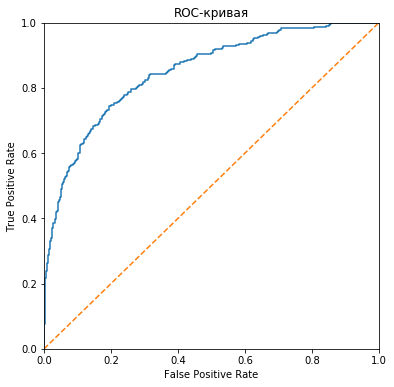

In [47]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show() 

In [48]:
auc_roc = roc_auc_score(y_test,proba_one)

print(auc_roc)

0.8499203694855868


## Вывод:

В этом проекте мы исследовали датасет клиентов банка, с целью построить модель предсказания оттока.
Было проведено первичное исследование и преобразование данных, приведение категориальных признаков к числовому виду методом прямого кодирования и их масшабирование. Исследованы модели Random Forest, Decision Tree и k-Nearest Neighborn на несбалансированных данных, проведена их балансировка и заключительное тестирование выбранной модели Random Forest. Также была построена ROC-кривая и получена метрика AUC_ROC.